# Predicting the sale price of bulldozers using machine learning

We are going to go through a machine learning project with the objective of predicting the prices of bulldozers.


## Problem Definition 
How well can we predict the future price of a bulldozer given the characteristics and historical prices for the same 

## Data 
Data is downloaded from kaggle,bluebook for bulldozers competition 
There are three main datasets :

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## Evaluation 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more details on evaluation check : https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

** thegoal for most regression problem is to minimize the error for example our aim here is to build a machine learning model which minimizes RMLSE 


## Features 

Kaggle provides a data dictionary for reference https://www.kaggle.com/c/bluebook-for-bulldozers/data?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns

In [2]:
#Import training and validation data set 
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)
df.shape

(412698, 53)

In [3]:
df.info

<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

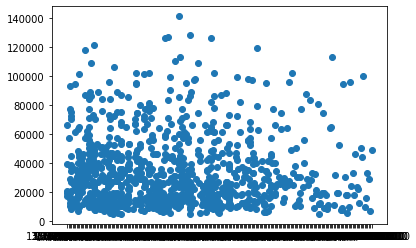

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

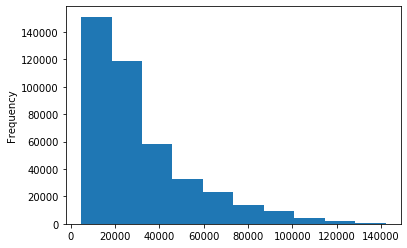

In [6]:
df.SalePrice.plot.hist()

### Parsing dates 

When working on time series problems we want to enrich date and time as much as possible. 
We can do this by telling pandas which of our columns has dates in it using the parse_dates parameter

In [7]:
# Import data again, but thi stime parse dates 

df = pd.read_csv("data/TrainAndValid.csv", low_memory=False,
                 parse_dates=["saledate"])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

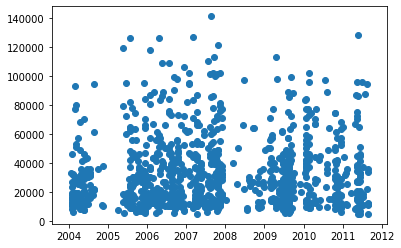

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort Dataframe by saledate 
When working with time series it is a good idea to sort data by date 

In [12]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [13]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe 
so that when we manipulate the data we can still refer to the original one 



In [14]:
df_tmp = df.copy()

## Add a datetime for saledate column

In [15]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [16]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [17]:
df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [18]:
df_tmp["SaleYear"] =df_tmp.saledate.dt.year
df_tmp["saleMonth"]= df_tmp.saledate.dt.month
df_tmp["saleDay"]= df_tmp.saledate.dt.day
df_tmp["saledayof the week"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleday of the year"]=df_tmp.saledate.dt.dayofyear

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# Now we have enriched dataframe with date time features, we can remove the saledate column 

df_tmp.drop("saledate", axis=1, inplace=True)

In [21]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Modeliing 

We have done enough EDA, now llet's do some model based EDA 

In [22]:
#let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=1,
                              random_state=42)

## Convert strings into categories by using pandas categories function 

One way to convert strings data into categorical is to use pandas funtions for converting.
https://pbpython.com/pandas_dtypes.html

In [23]:
# Find the columns which contain strings 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
## This will turn all of the string values into category values 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]= content.astype("category").cat.as_ordered()

df_tmp.info()

df_tmp.info()

In [25]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## save preprocessed Data 


In [26]:
# Export current temp data 

df_tmp.to_csv("data/fraud_tmp.csv", index=False)

In [27]:
#Import preprocessed data 

df_tmp = pd.read_csv("data/train_tmp.csv",low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,saleMonth,saleDay,saledayof the week,saleday of the year
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


# Dealing with missing data 

### Fill numerical missing values first 

In [52]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
SaleYear
saleMonth
saleDay
saledayof the week
saleday of the year
auctioneerID_is_missing
UsageBand_is_missing
fiModelDesc_is_missing
fiBaseModel_is_missing
fiSecondaryDesc_is_missing
fiModelSeries_is_missing
fiModelDescriptor_is_missing
ProductSize_is_missing
fiProductClassDesc_is_missing
state_is_missing
ProductGroup_is_missing
Prod

In [29]:

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [30]:
# Fill numeric rows with median 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary column which tells us if the data was missing 
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            # fill the missing values with median 
            df_tmp[label]= content.fillna(content.median())

In [31]:
# check if there are any null numeric values 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

### filling all the categorical values with missing data 

In [32]:
# check for columns which aren't numeric 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
# turn categorical variables in to numbers and fill missing values 
for label, content in df_tmp.items():
     if not pd.api.types.is_numeric_dtype(content):
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            # turn categories to numbers and add +1 
            df_tmp[label]=pd.Categorical(content).codes +1
    

In [34]:
df_tmp.T.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
412693    0
412694    0
412695    0
412696    0
412697    0
Length: 412698, dtype: int64

### Now that all the data is numeric and there are no missing values, we should be able to build a mahcine learning model with it. 

In [35]:
%%time

# Instantiate model 
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# fit the model to with the data 
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

Wall time: 14min 29s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
#score the model 
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875468079970563

## Splitting data into training and validation sets 


In [37]:
df_val =df_tmp[df_tmp.SaleYear==2012]
df_train = df_tmp[df_tmp.SaleYear !=2012]
len(df_val), len(df_train)

(11573, 401125)

In [38]:
#split this data into x,y 

x_train, y_train = df_train.drop("SalePrice",axis=1),df_train.SalePrice
x_val, y_val = df_val.drop("SalePrice",axis=1),df_val.SalePrice

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building a custom evaluation function 

In [39]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error 
    """
    
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#create funtion to evaluate model  on a few different functions 
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds= model.predict(x_val)
    scores = {"Training MAE":mean_absolute_error(y_train, train_preds),
             "Valid MAE":mean_absolute_error(y_val, val_preds),
             "Training RMSLE":rmsle(y_train, train_preds),
             "Valid RMSLE":rmsle(y_val,val_preds),
             "Training R^2":r2_score(y_train,train_preds),
             "Valid R^2":r2_score(y_val,val_preds)}
    return scores

## testing our model on a subset to tune the hyperparameters 

In [40]:
# # This takes way too long for experimentation 

# %%time

# Instantiate model 
# model = RandomForestRegressor(n_jobs=-1,
                            #  random_state=42)

# fit the model to with the data 
# model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

In [41]:
%%time

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)
model.fit(x_train,y_train)

Wall time: 47.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [42]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter tuning using Randomized_search_CV


In [43]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# different random forest regressor parameters 

rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split":np.arange(2, 20, 2),
          "min_samples_leaf":np.arange(1, 20, 2),
          "max_features":[0.5, 1, "sqrt", "auto"],
          "max_samples":[10000]}

#Instantiate RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,  
                              verbose=True)

#fit the randomized search CV model 
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.1min finished


Wall time: 3min 20s
Parser   : 104 ms


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [44]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

## Train the model with the best hyperparameters  ( Daniel discovered after 100 n_iters )



In [45]:
%%time

# ideal hyperparameters 

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples= None,
                                   random_state=42)

#Fit the ideal model 
ideal_model.fit(x_train,y_train)

Wall time: 2min 33s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [46]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

## Using Model with Test data 

In [74]:
#Import the test data 
df_test = pd.read_csv("data/test.csv", 
                      low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data getting the test data in the same format as the training data 

In [69]:
def preprocess_data(df):
    """
    Performs transformations on df and returns real df 
    """
    df["SaleYear"] =df.saledate.dt.year
    df["saleMonth"]= df.saledate.dt.month
    df["saleDay"]= df.saledate.dt.day
    df["saledayof the week"]=df.saledate.dt.dayofweek
    df["saleday of the year"]=df.saledate.dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    
    # Fill numeric rows with median 
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #add a binary column which tells us if the data was missing 
                df_tmp[label+"_is_missing"]=pd.isnull(content)
                # fill the missing values with median 
                df[label]= content.fillna(content.median())
    
        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]= pd.isnull(content)
        
            #We add + 1 to category code because pandas encodes missing values as -1
            df[label]=pd.Categorical(content).codes+1
        
    
    
    
    
    return df

In [75]:
# Process the test data 

df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [76]:
# we can find what columns differ using set 

set(x_train.columns)-set(df_test.columns)

{'MachineHoursCurrentMeter_is_missing', 'auctioneerID_is_missing'}

#manually set df_test to have auctioneer_id_is_missing column 
df_test["auctioneerID_is_missing"]=False
df_test["MachineHoursCurrentMeter_is_missing"]=False
df_test.head()

#### Finally our test dataframe has the samme features as the training dataframe, we can make predictions 



In [79]:
# Making predictions on the dataset 

test_preds = ideal_model.predict(df_test)
test_preds

array([19474.72786321, 21739.02055353, 45520.58228386, ...,
       13382.21115644, 18800.13001252, 26450.5270604 ])

In [81]:
# format predictions into same format that kaggle expects , dataframe with sale id and price 
df_preds= pd.DataFrame()
df_preds["SalesID"]= df_test["SalesID"]
df_preds["Price"]=test_preds
df_preds

,SalesID,Price
0,1227829,19474.727863
1,1227844,21739.020554
2,1227847,45520.582284
3,1227848,70555.261335
4,1227863,43223.458998
...,...,...
12452,6643171,44940.272946
12453,6643173,14137.605572
12454,6643184,13382.211156
12455,6643186,18800.130013


In [83]:
# Export prediction data 

df_preds.to_csv("data/test_predictions.csv",index=False)

## Feature importances 


In [84]:
# find feature importance of our best model 

ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [89]:
# Helper function for plotting feature importance 
def plot_features(columns,importances, n=20):
    df = (pd.DataFrame({"features":columns,
                      "feature_importances":importances})
    .sort_values("feature_importances",ascending=False)
    .reset_index(drop=True))
        
    #Plot the dataframe 
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

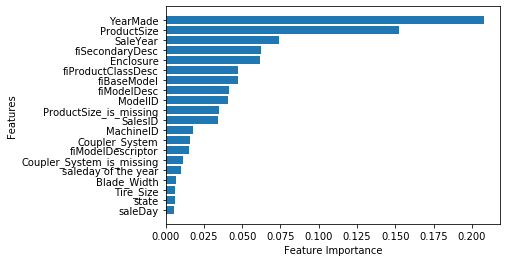

In [90]:
plot_features(x_train.columns, ideal_model.feature_importances_)